In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
# %matplotlib notebook

In [94]:
nx = 100  # number of x steps
ny = 100
C  = 1
n  = 2
bc = 30
nt = 1000
nit = 100
vis = 0.01
Lx = 2
Ly = 2
dx = Lx/(nx-1)
dy = Ly/(ny-1)
dt =  0.001*dx
x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)
u = np.zeros((ny,nx))
v = np.zeros((ny,nx))
p =  np.zeros((ny,nx))
un = np.zeros((ny,nx))
pn = np.ones((ny,nx))

In [95]:
def sigma(p,C,n):
    return C*p**n

In [96]:
def continuity(u,v,p):
    
    pn = np.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        
        pn = p.copy()
        un = u.copy()
        vn = v.copy()
        
        uij = un[1:-1,1:-1]
        ui1j = un[1:-1,0:-2]
        
        du = uij - ui1j
        
        vij = vn[1:-1,1:-1]
        vi1j = vn[1:-1,0:-2]
        dv = vij -vi1j
        
        pij = pn[1:-1,1:-1]
        pi1j= pn[1:-1,0:-2]
        dp = pij-pi1j
        
        dpy=pij-pn[0:-2,1:-1]
        
        dvy =vij-vn[0:-2,1:-1]
        
        p[1:-1,1:-1] = pij-dt*(pij*du/dx+uij*dp/dx+vij*dpy/dy+pij*dvy/dy)
        
#        BC at x = 2

         
        buij = un[1:-1,-1]
        bui1j = un[1:-1,-2]
        bdu = buij - bui1j
        
        bvij = vn[1:-1,-1]
        bvi1j = vn[1:-1,-2]
        bdv = bvij -bvi1j
   
        
        bpij = pn[1:-1,-1]
        bpi1j= pn[1:-1,-2]
        bdp = bpij-bpi1j
   
        
        bdpy=bpij-pn[0:-2,-1]
        
        bdvy =bvij-vn[0:-2,-1]
        
    
        p[1:-1,-1] =  bpij-dt*(bpij*bdu/dx+buij*bdp/dx+bvij*bdpy/dy+bpij*bdvy/dy)
        
        # BC at x=0
        zuij = un[1:-1,0]
        zui1j = un[1:-1,-1]
        zdu = zuij - zui1j
        
        zvij = vn[1:-1,0]
        zvi1j = vn[1:-1,-1]
        zdv = zvij -zvi1j
   
        
        zpij = pn[1:-1,0]
        zpi1j= pn[1:-1,-1]
        zdp = zpij-zpi1j
   
        
        zdpy=zpij-pn[0:-2,0]
        
        zdvy =zvij-vn[0:-2,0]
        
        
#         p[1:-1,0] =  zpij-dt*(zpij*zdu/dx+zuij*zdp/dx+zvij*zdpy/dy+zpij*zdvy/dy)
        p[1:-1,0] = p[1:-1,-1]
#                               
#         p[0,1:-1] = p[-1,1:-1]
#         p[-1,1:-1] = p[1,1:-1]
#         p[1:-1,0:bc] = p[1:-1,nx-bc:nx]
        
    return p

In [97]:
def compequation(u,v,p):
    
    for q in range(nit):
        
        p = continuity(u,v,p)
        sig = sigma(p,1,2)
        
        pn = p.copy()
        un = u.copy()
        vn = v.copy()
        
        uij = un[1:-1,1:-1]
        ui1j = un[1:-1,0:-2]
        du = uij -ui1j
        duy = uij-un[0:-2,1:-1]
        
        vij = vn[1:-1,1:-1]
        vi1j = vn[1:-1,0:-2]
        dv = vij -vi1j
        dvy = vij-vn[0:-2,1:-1]
        
        pij = pn[1:-1,1:-1]
        pi1j= pn[1:-1,0:-2]
        dp = pij-pi1j
        
        dsig = sig[1:-1,1:-1]-sig[1:-1,0:-2]
        d2u = un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2]
        d2uy = un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1]
        
        d2v = vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2]
        d2vy = vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1]
        
#         vy = dvy/dy
        vxy = vn[2:,2:]-vn[2:,0:-2]-vn[0:-2,2:]+vn[0:-2,0:-2]
        
#         ux = du/dx
        uxy = un[2:,2:]-un[2:,0:-2]-un[0:-2,2:]+un[0:-2,0:-2]

        u[1:-1,1:-1] = un[1:-1,1:-1] + dt*(-uij*du/dx-vij*duy/dy+(-dsig/dx+vis*(4/3*d2u/dx**2+d2uy/dy**2+0.25*vxy/dx/dy))/pij)
        
        v[1:-1,1:-1] = vn[1:-1,1:-1] + dt*(-vij*dvy/dy-uij*dv/dx+(-dsig/dy+vis*(4/3*d2vy/dy**2+d2v/dx**2+0.25*uxy/dx/dy))/pij)
        
#         Periodic B at x = 2
        buij = un[1:-1,-1]
        bui1j = un[1:-1,-2]
        bdu = buij -bui1j
        bduy = buij-un[0:-2,-1]
        
        bvij = vn[1:-1,-1]
        bvi1j = vn[1:-1,-2]
        bdv = bvij -bvi1j
        bdvy = bvij-vn[0:-2,-1]
        
        bpij = pn[1:-1,-1]
        bpi1j= pn[1:-1,-2]
        bdp = bpij-bpi1j
        
        bdsig = sig[1:-1,-1]-sig[1:-1,-2]
        bd2u = un[1:-1,0]-2*un[1:-1,-1]+un[1:-1,-2]
        bd2uy = un[2:,-1]-2*un[1:-1,-1]+un[0:-2,-1]
        
        bd2v = vn[1:-1,0]-2*vn[1:-1,-1]+vn[1:-1,-2]
        bd2vy = vn[2:,-1]-2*vn[1:-1,-1]+vn[0:-2,-1]
        
#         vy = dvy/dy
        bvxy = vn[2:,0]-vn[2:,-2]-vn[0:-2,0]+vn[0:-2,-2]
        
#         ux = du/dx
        buxy = un[2:,0]-un[2:,-2]-un[0:-2,0]+un[0:-2,-2]

        u[1:-1,-1] = un[1:-1,-1] + dt*(-buij*bdu/dx-bvij*bduy/dy+(-bdsig/dx+vis*(4/3*bd2u/dx**2+bd2uy/dy**2+0.25*bvxy/dx/dy))/bpij)
        
        v[1:-1,-1] = vn[1:-1,-1] + dt*(-bvij*bdvy/dy-buij*bdv/dx+(-bdsig/dy+vis*(4/3*bd2vy/dy**2+bd2v/dx**2+0.25*buxy/dx/dy))/bpij)
    
        
#       Periodidc at x = 0
        zuij = un[1:-1,0]
        zui1j = un[1:-1,-1]
        zdu = zuij -zui1j
        zduy = zuij-un[0:-2,0]
        
        zvij = vn[1:-1,0]
        zvi1j = vn[1:-1,-1]
        zdv = zvij -zvi1j
        zdvy = zvij-vn[0:-2,0]
        
        zpij = pn[1:-1,0]
        zpi1j= pn[1:-1,-1]
        zdp = zpij-zpi1j
        
        zdsig = sig[1:-1,0]-sig[1:-1,-1]
        zd2u = un[1:-1,1]-2*un[1:-1,0]+un[1:-1,-1]
        zd2uy = un[2:,0]-2*un[1:-1,0]+un[0:-2,0]
        
        zd2v = vn[1:-1,1]-2*vn[1:-1,0]+vn[1:-1,-1]
        zd2vy = vn[2:,0]-2*vn[1:-1,0]+vn[0:-2,0]
        
#         vy = dvy/dy
        zvxy = vn[2:,1]-vn[2:,1]-vn[0:-2,1]+vn[0:-2,-1]
        
#         ux = du/dx
        zuxy = un[2:,1]-un[2:,-1]-un[0:-2,1]+un[0:-2,-1]

        u[1:-1,0] = un[1:-1,0] + dt*(-zuij*zdu/dx-zvij*zduy/dy+(-zdsig/dx+vis*(4/3*zd2u/dx**2+zd2uy/dy**2+0.25*zvxy/dx/dy))/zpij)
        
        v[1:-1,0] = vn[1:-1,0] + dt*(-zvij*zdvy/dy-zuij*zdv/dx+(-zdsig/dy+vis*(4/3*zd2vy/dy**2+zd2v/dx**2+0.25*zuxy/dx/dy))/zpij)
        
        
    return u,v,p

In [98]:
# u = np.sin(x)
a = 0.01
x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)
xv,yv = np.meshgrid(x,y)
u = np.sin(xv)*np.cos(yv)
v = np.cos(xv)*np.sin(xv)

a = 0.01
u = np.sin(xv)
v = np.sin(yv)
# p = np.sin(xv)
p = np.sin(xv)
# at t = 0
# p = xv+yv
# print()
# p = continuity(u,v,p)
u,v,p = compequation(u,v,p)
print(u,v,p)

[[0.         0.02020065 0.04039305 ... 0.92536476 0.91751832 0.90929743]
 [0.07776229 0.33225704 0.13044446 ... 0.92672611 0.91685176 0.85190941]
 [0.07637795 0.31410237 0.16017037 ... 0.92671049 0.91680298 0.85017807]
 ...
 [0.06803643 0.32117155 0.16400353 ... 0.92679059 0.91732204 0.85589516]
 [0.06568576 0.29741756 0.15957213 ... 0.92675468 0.91736383 0.8570141 ]
 [0.         0.02020065 0.04039305 ... 0.92536476 0.91751832 0.90929743]] [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.03515505 0.33262104 0.09626594 ... 0.02090029 0.02044131 0.01734662]
 [0.05241777 0.34494653 0.14950183 ... 0.04104111 0.04095814 0.03684108]
 ...
 [0.93655322 1.2375624  1.04048654 ... 0.92682406 0.92676675 0.92199493]
 [0.92518313 1.19853593 1.02574183 ... 0.91896683 0.91919086 0.91383463]
 [0.90929743 0.90929743 0.90929743 ... 0.90929743 0.90929743 0.90929743]] [[0.         0.02020065 0.04039305 ... 0.92536476 0.91751832 0.90929743]
 [0.9041452  0.24439404 0.1846323  ... 

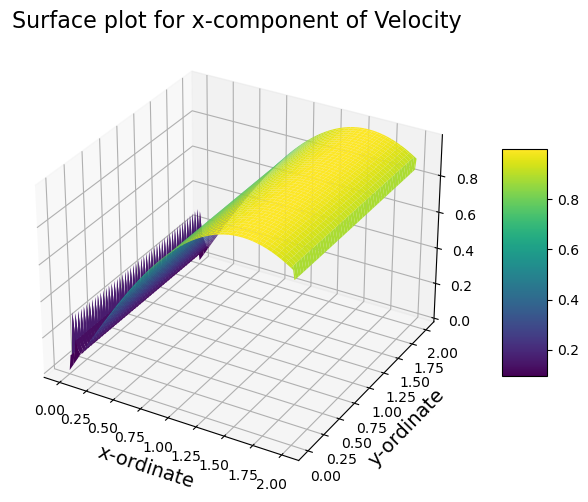

In [99]:
fig = plt.figure(figsize=(10,6), dpi=100)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xv, yv, u,cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('Surface plot for x-component of Velocity', fontsize = 16)
plt.xlabel('x-ordinate', fontsize = 14)
plt.ylabel('y-ordinate', fontsize = 14)
plt.show()

Text(0, 0.5, 'Y')

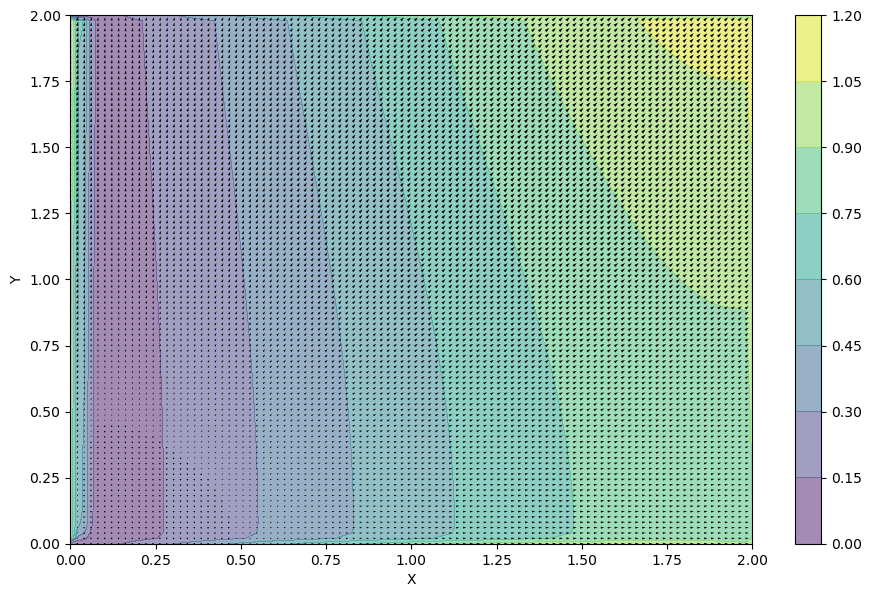

In [100]:
fig = plt.figure(figsize=(11,7),dpi=100)
plt.contourf(xv,yv,p,alpha=0.5,cmap=cm.viridis)
plt.colorbar()
# plt.contourf(xv,yv,u,cmap=cm.viridis)
plt.quiver(xv,yv,u,v)
plt.xlabel('X')
plt.ylabel('Y')

In [101]:
sig = sigma(p,C,n)
# print(xv,yv)

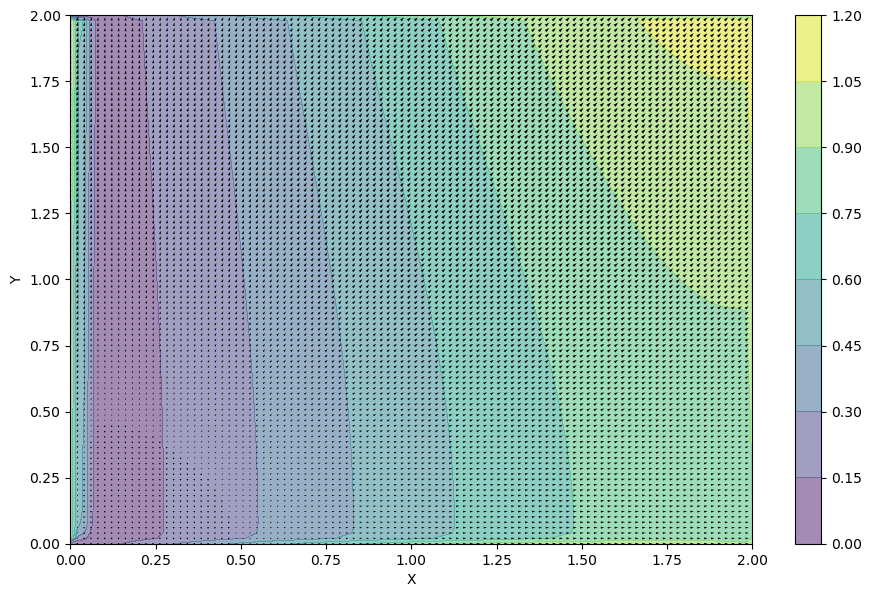

In [102]:
fig = plt.figure(figsize=(11, 7), dpi=100)
plt.contourf(xv, yv, p, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
# plt.contour(xv, yv, v, cmap=cm.viridis)
plt.quiver(xv, yv, u,v)
plt.xlabel('X')
plt.ylabel('Y');

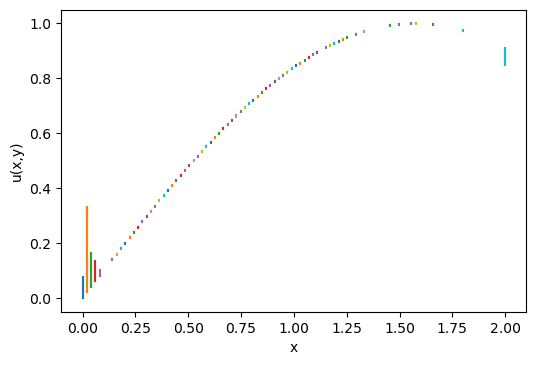

In [103]:
plt.figure(dpi=100)
plt.plot(xv,u)
plt.xlabel("x")
plt.ylabel("u(x,y)")
plt.show()

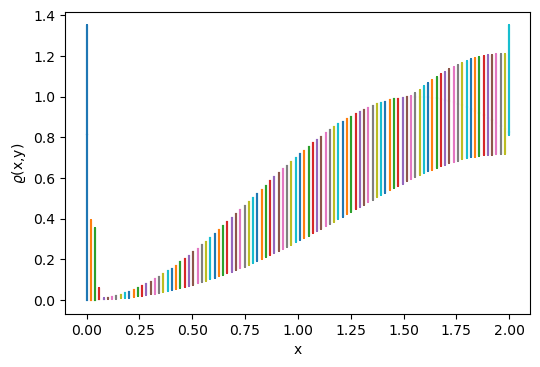

In [104]:
plt.figure(dpi=100)
plt.plot(xv,sig)
plt.xlabel("x")
plt.ylabel(r"$\varrho$(x,y)")
# plt.label("")
plt.show()

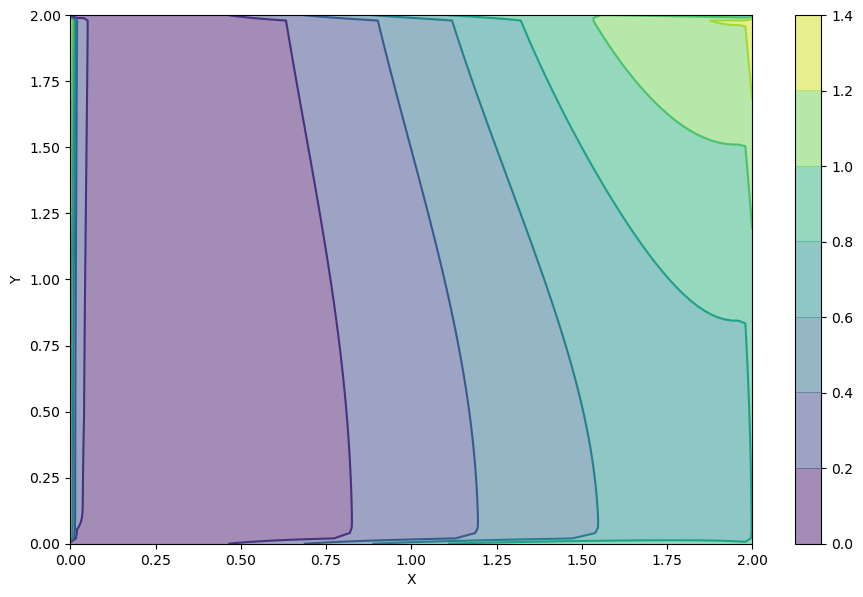

In [105]:
fig = plt.figure(figsize=(11, 7), dpi=100)
plt.contourf(xv, yv, sig, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(xv, yv, sig, cmap=cm.viridis)
# plt.quiver(xv, yv, u,u)
plt.xlabel('X')
plt.ylabel('Y');

In [106]:
def animate(u,v,p):
#     u = -u
    fig = plt.figure(figsize=(12, 6), dpi=100)
    plt.contourf(xv, yv, u, alpha=0.5, cmap=cm.viridis)
    plt.colorbar()
    plt.contour(xv, yv, u, cmap=cm.viridis)
    plt.quiver(xv[::2, ::2], yv[::2, ::2], u[::2, ::2], v[::2, ::2])
    plt.xlabel('X')
    plt.ylabel('Y');


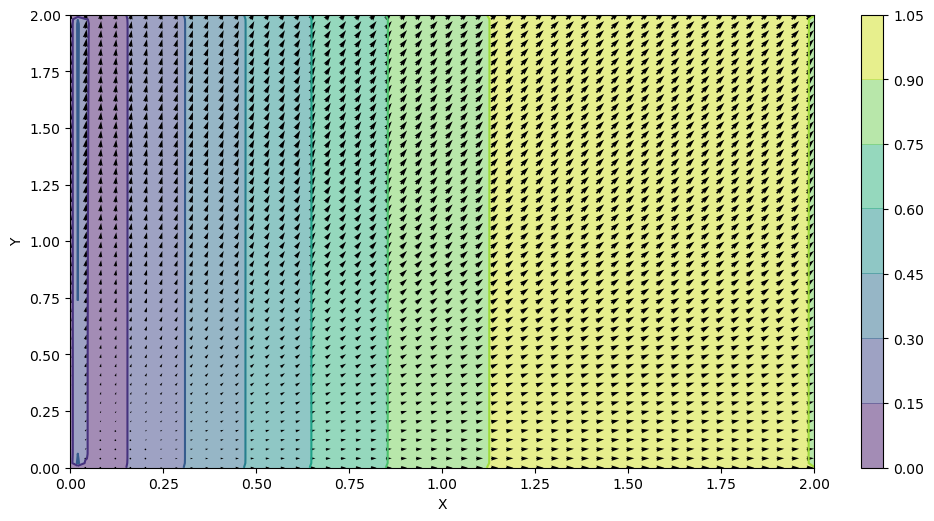

In [107]:
animate(u,v,p)

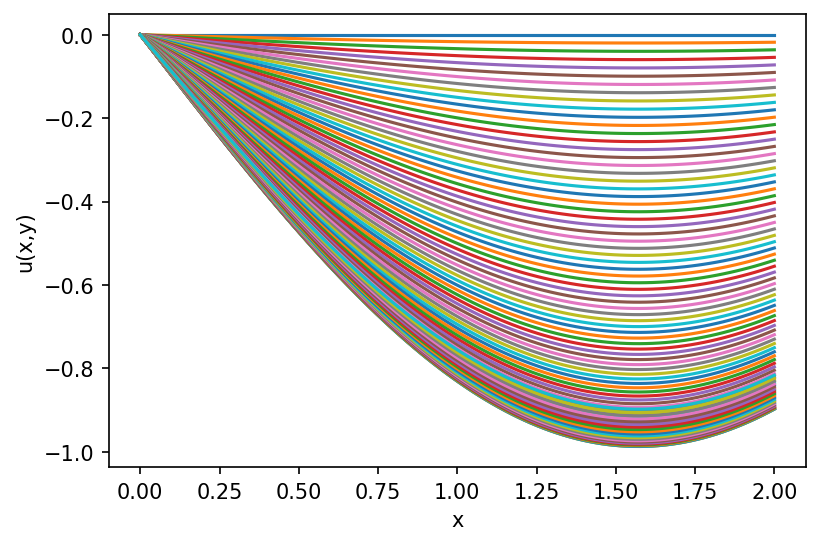

In [108]:
t=  0.8
# x = np.linspace(0,2*np.pi,100)
pi = np.pi
xv,yv = np.meshgrid(x,y)
x1 = np.linspace(0,2*np.pi,100)
u = -np.sin(xv)*np.sin(yv)*np.exp(-2*vis*t**2)
plt.figure(dpi=150)
plt.plot(x,u)
plt.ylabel("u(x,y)")
plt.xlabel("x")
plt.show()
# print(xv,yv)

In [109]:
# p = np.sin(x)-u**2/2
# plt.plot(x,p)
# plt.plot()